In [56]:
import random
from collections import Counter
from math import sqrt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt

Text(0, 0.5, 'Значение случайной величины')

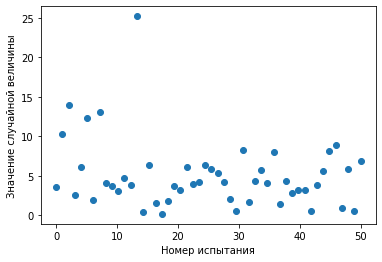

In [57]:
expon = sps.expon(loc=0, scale=5)
size = 50
sample = expon.rvs(size)
X = np.linspace(0, size, size)
plt.plot(X, sample, 'o')
plt.xlabel("Номер испытания")
plt.ylabel("Значение случайной величины")

Text(0, 0.5, 'Значение эмпирической функции распределения')

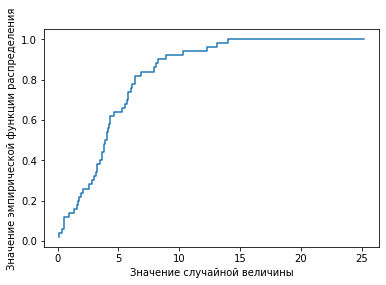

In [58]:
sorted_sample = sorted(sample)
cdf = [1.0 / size]
for i in range(1, size):
    cdf.append(cdf[i - 1] + 1.0 / size)
    
plt.step(sorted_sample, cdf)
plt.xlabel("Значение случайной величины")
plt.ylabel("Значение эмпирической функции распределения")

Text(0, 0.5, 'Количество появлений')

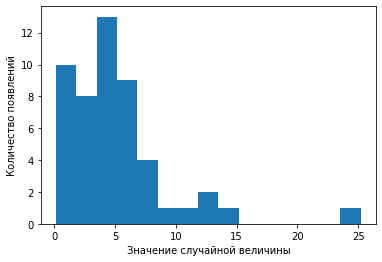

In [59]:
plt.hist(sample, bins=15)
plt.xlabel("Значение случайной величины")
plt.ylabel("Количество появлений")

In [60]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), sps.sem(a)
    h = se * sps.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m+h

In [61]:
def create_sample_parameters_table(sample):
    mean = np.mean(sample)
    confid95 = mean_confidence_interval(sample)
    s = sum(sample)
    maximum = max(sample)
    minimum = min(sample)
    range = maximum - minimum
    std_dev = sps.tstd(sample)
    variance = std_dev ** 2
    std_err = sps.sem(sample)
    skewness = sps.skew(sample)
    kurtosis = sps.kurtosis(sample)
    return pd.DataFrame([[len(sample), mean, confid95, s, maximum, minimum, range, variance, std_dev, std_err, skewness, kurtosis]],
                        columns=["Sample size", "Mean", "Confid. 95%", "Sum", "Maximun", "Minimum", "Range", "Variance", "Std. Dev.", "Standard Error", "Skewness", "Kurtosis"])

params = create_sample_parameters_table(sample)
params

,Sample size,Mean,Confid. 95%,Sum,Maximun,Minimum,Range,Variance,Std. Dev.,Standard Error,Skewness,Kurtosis
0,50,5.035148,"(3.8074846037388457, 6.262811017000169)",251.757391,25.186933,0.157094,25.029839,18.660357,4.319764,0.610907,2.368716,7.946044


Text(0, 0.5, 'Y')

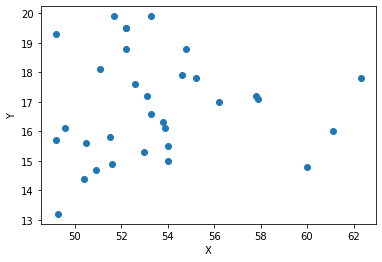

In [62]:
sample = [[57.8, 54.6, 54.8, 51.7, 61.1, 62.3, 52.2, 49.2, 53.9, 60, 56.2, 55.2, 53.3, 57.9, 54, 52.6, 53.8, 53.1, 51.5, 54, 50.4, 53, 53.3, 51.6, 50.9, 49.6, 52.2, 50.5, 51.1, 52.2, 49.2, 49.3],
          [17.2, 17.9, 18.8, 19.9, 16, 17.8, 18.8, 19.3, 16.1, 14.8, 17, 17.8, 19.9, 17.1, 15.5, 17.6, 16.3, 17.2, 15.8, 15, 14.4, 15.3, 16.6, 14.9, 14.7, 16.1, 19.5, 15.6, 18.1, 19.5, 15.7, 13.2]]

plt.plot(sample[0], sample[1], 'o')
plt.xlabel("X")
plt.ylabel("Y")

In [63]:
corr_matrix = np.corrcoef(sample[0], sample[1])
corr_table = pd.DataFrame(corr_matrix, columns=['x', 'y'])
corr_table.index = ['X', 'Y']
corr_table

,x,y
X,1.000000,0.063672
Y,0.063672,1.000000


In [64]:
paramsX = create_sample_parameters_table(sample[0])
paramsY = create_sample_parameters_table(sample[1])
params = pd.DataFrame(data = [paramsX.values.tolist()[0], paramsY.values.tolist()[0]], columns=paramsX.columns)
params.index = ['X', 'Y']
params

,Sample size,Mean,Confid. 95%,Sum,Maximun,Minimum,Range,Variance,Std. Dev.,Standard Error,Skewness,Kurtosis
X,32,53.515625,"(52.308855024864904, 54.722394975135096)",1712.5,62.3,49.2,13.1,11.203296,3.347133,0.591695,1.016573,0.543074
Y,32,16.856250,"(16.21711586472449, 17.495384135275515)",539.4,19.9,13.2,6.7,3.142540,1.772721,0.313376,0.111409,-0.854636


In [65]:
def find_count_in_range(sample, x_l, y_l, x_r, y_r):
    count = 0
    size = len(sample[0])
    for i in range(size):
        cur_x = sample[0][i]
        cur_y = sample[1][i]
        if x_l < cur_x <= x_r and y_l < cur_y <= y_r:
            count += 1
    return count


start_x = 49
start_y = 13
x_pos = []
y_pos = []
freq = []
while start_x <= 63:
    while start_y < 20:
        count = find_count_in_range(sample, start_x, start_y, start_x + 2, start_y + 1)
        if count > 0:
            x_pos.append(start_x)
            y_pos.append(start_y)
            freq.append(count)
        start_y += 1
    start_x += 2
    start_y = 13

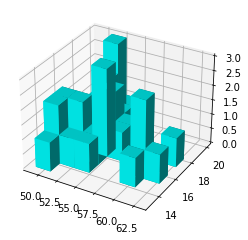

In [66]:
fig = plt.figure()
ax = plt.axes(projection="3d")

num_bars = len(x_pos)
z_pos = [0] * num_bars
x_size = np.full(num_bars, 2)
y_size = np.ones(num_bars)

ax.bar3d(x_pos, y_pos, z_pos, x_size, y_size, freq, color='aqua')
plt.show()
